# Secrets of Vinho Verde

This week we will use the power of the **scikit-learn** library to establish which **factors** contribute to a great glass of red wine.

1599 wines were tested by at least 3 wine experts and given a quality grade from **0** (terrible) to **10** (excellent).

There were **11 factors** measured: *fixed acidity*, *volatile acidity*, *citric acid*, *residual sugar*, *chlorides*, *free and total sulphur dioxide*, *density*, *pH*, *sulphates* and *alcohol*.

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

In [62]:
# Load in the red wine data from the UCI ML website.
df_redwine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')

In [63]:
# Take a look
df_redwine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [64]:
# Data dimensionality (rows, colums)
df_redwine.shape

(1599, 12)

In [65]:
# Data distributing
df_redwine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Task

In this task, you have to:
1. Split the set in training and testing sets (80-20).
2. Apply the following classification methods:
  * Gaussian Naive Bayes (NB)
  * Decision Tree (DT)
  * K-Nearest Neighbors (KNN)
    * n_neighbors = {3, 5}, 
    * weights = {'uniform', 'distance'}
  * Random Forest (RF)
    * n_estimators = 100

3. Evaluate the quality of each model by computing:
  * Confusion matrix
  * ROC
  * Cross-validation score

**Question:**
Which model/configuration performs better predictions?


In [66]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score, train_test_split

import seaborn as sns
import numpy as np

# Gaussian Naive Bayes (NB)

In [67]:
train, test = train_test_split(df_redwine, train_size=0.8)
X_train = train.drop(["quality"], axis=1) # attributes: ph, alcohol, etc
y_train = train["quality"]

X_test = test.drop(["quality"], axis=1) # attributes: ph, alcohol, etc
y_test = test["quality"]

In [68]:
gnb = GaussianNB()
y_pred_gnb = gnb.fit(X_train, y_train)
y_pred_gnb_pred = gnb.predict(X_test)

In [69]:
class GaussianNBWrapper(GaussianNB):
  def predict(self, X):
    # Call to GaussianNB "predict"
    temp = super().predict(X)
    # Rounding numbers
    return np.rint(temp).astype(int)

In [70]:
gnb_wr = GaussianNBWrapper().fit(X_train, y_train)
y_test_pred = gnb_wr.predict(X_test)

### Confusion matrix

<AxesSubplot:>

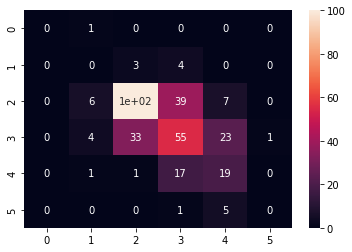

In [71]:
cf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb_pred)

sns.heatmap(cf_matrix_gnb, annot=True)

<AxesSubplot:>

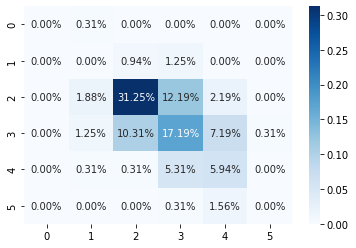

In [72]:
sns.heatmap(cf_matrix_gnb/np.sum(cf_matrix_gnb), annot=True, fmt='.2%', cmap='Blues')

### ROC Curve

In [73]:
X = df_redwine.drop(["quality"], axis=1) # attributes: ph, alcohol, etc
# Binarize the output
y = df_redwine["quality"]
y = label_binarize(y, classes=[3, 4, 5, 6, 7, 8])
n_classes = y.shape[1]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [74]:
# Learn to predict each class against the other
classifier = OneVsRestClassifier(GaussianNBWrapper())
classifier.fit(X_train, y_train)
y_score = classifier.predict(X_test)

In [75]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

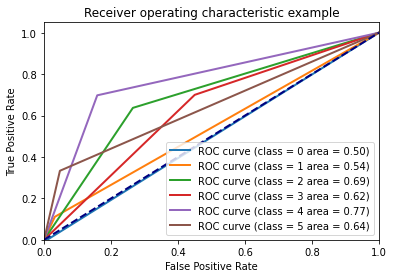

In [76]:
plt.figure()
lw = 2

for i in range(n_classes):
  plt.plot(fpr[i], tpr[i], lw=lw, label="ROC curve (class = {0} area = {1:0.2f})".format(i, roc_auc[i]))
  
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

### Cross validation

In [77]:
X = df_redwine.drop(["quality"], axis=1) # attributes: ph, alcohol, etc
y = df_redwine["quality"]

scores = cross_val_score(gnb_wr, X, y, cv=5)

print("Scores: ", scores)
print("Mean score: ", scores.mean())
print("Standard deviation: ", scores.std())

Scores:  [0.5125    0.46875   0.58125   0.49375   0.5862069]
Mean score:  0.5284913793103448
Standard deviation:  0.04721498287207132


# Decision Tree (DT)

In [78]:
train, test = train_test_split(df_redwine, train_size=0.8)
X_train = train.drop(["quality"], axis=1) # attributes: ph, alcohol, etc
y_train = train["quality"]

X_test = test.drop(["quality"], axis=1) # attributes: ph, alcohol, etc
y_test = test["quality"]

In [79]:
dtc = DecisionTreeClassifier()
y_pred_dtc = dtc.fit(X_train, y_train)
y_pred_dtc_pred = dtc.predict(X_test)

In [80]:
class DecisionTreeClassifierWrapper(DecisionTreeClassifier):
  def predict(self, X):
    # Call to DecisionTreeClassifier "predict"
    temp = super().predict(X)
    # Rounding numbers
    return np.rint(temp).astype(int)

In [81]:
dtc_wr = DecisionTreeClassifierWrapper().fit(X_train, y_train)
y_test_pred = dtc_wr.predict(X_test)

### Confusion matrix

<AxesSubplot:>

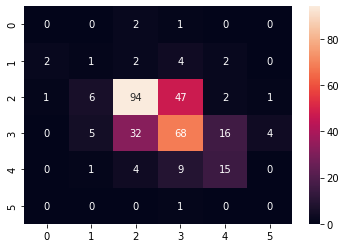

In [82]:
cf_matrix_dtc = confusion_matrix(y_test, y_pred_dtc_pred)

sns.heatmap(cf_matrix_dtc, annot=True)

<AxesSubplot:>

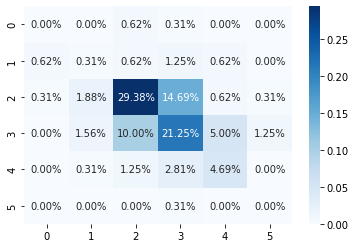

In [83]:
sns.heatmap(cf_matrix_dtc/np.sum(cf_matrix_dtc), annot=True, fmt='.2%', cmap='Blues')

### ROC Curve

In [84]:
X = df_redwine.drop(["quality"], axis=1) # attributes: ph, alcohol, etc
# Binarize the output
y = df_redwine["quality"]
y = label_binarize(y, classes=[3, 4, 5, 6, 7, 8])
n_classes = y.shape[1]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [85]:
# Learn to predict each class against the other
classifier = OneVsRestClassifier(DecisionTreeClassifierWrapper())
classifier.fit(X_train, y_train)
y_score = classifier.predict(X_test)

In [86]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

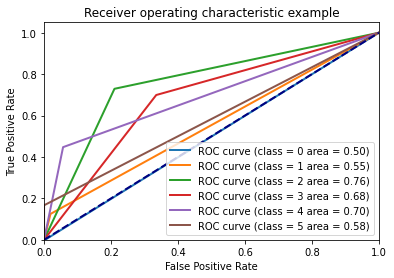

In [87]:
plt.figure()
lw = 2

for i in range(n_classes):
  plt.plot(fpr[i], tpr[i], lw=lw, label="ROC curve (class = {0} area = {1:0.2f})".format(i, roc_auc[i]))
  
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

### Cross validation

In [88]:
X = df_redwine.drop(["quality"], axis=1) # attributes: ph, alcohol, etc
y = df_redwine["quality"]

scores = cross_val_score(dtc_wr, X, y, cv=5)

print("Scores: ", scores)
print("Mean score: ", scores.mean())
print("Standard deviation: ", scores.std())

Scores:  [0.503125   0.453125   0.453125   0.503125   0.47962382]
Mean score:  0.4784247648902822
Standard deviation:  0.022368715563433325


# K-Nearest Neighbors (KNN)

## n=3 y weights=uniform

In [89]:
train, test = train_test_split(df_redwine, train_size=0.8)
X_train = train.drop(["quality"], axis=1) # attributes: ph, alcohol, etc
y_train = train["quality"]

X_test = test.drop(["quality"], axis=1) # attributes: ph, alcohol, etc
y_test = test["quality"]

In [90]:
knn3 = KNeighborsClassifier(n_neighbors=3, weights='uniform')
y_pred_knn3 = knn3.fit(X_train, y_train)
y_pred_knn3_pred = knn3.predict(X_test)

In [91]:
class KNeighborsClassifierWrapper(KNeighborsClassifier):
  def predict(self, X):
    # Call to KNeighborsClassifier "predict"
    temp = super().predict(X)
    # Rounding numbers
    return np.rint(temp).astype(int)

In [92]:
knn3_wr = KNeighborsClassifierWrapper().fit(X_train, y_train)
y_test_pred = knn3_wr.predict(X_test)

### Confusion matrix

<AxesSubplot:>

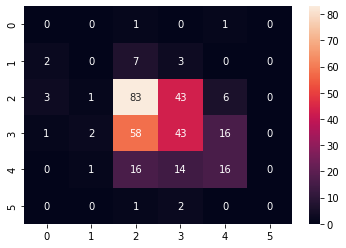

In [93]:
cf_matrix_knn3 = confusion_matrix(y_test, y_pred_knn3_pred)

sns.heatmap(cf_matrix_knn3, annot=True)

<AxesSubplot:>

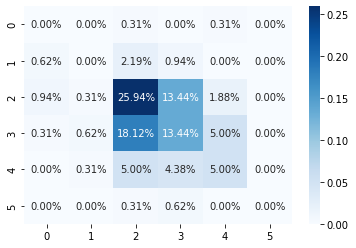

In [94]:
sns.heatmap(cf_matrix_knn3/np.sum(cf_matrix_knn3), annot=True, fmt='.2%', cmap='Blues')

### ROC Curve

In [95]:
X = df_redwine.drop(["quality"], axis=1) # attributes: ph, alcohol, etc
# Binarize the output
y = df_redwine["quality"]
y = label_binarize(y, classes=[3, 4, 5, 6, 7, 8])
n_classes = y.shape[1]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [96]:
# Learn to predict each class against the other
classifier = OneVsRestClassifier(KNeighborsClassifierWrapper())
classifier.fit(X_train, y_train)
y_score = classifier.predict(X_test)

In [97]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

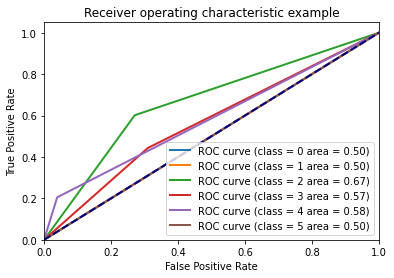

In [98]:
plt.figure()
lw = 2

for i in range(n_classes):
  plt.plot(fpr[i], tpr[i], lw=lw, label="ROC curve (class = {0} area = {1:0.2f})".format(i, roc_auc[i]))
  
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

### Cross validation

In [99]:
X = df_redwine.drop(["quality"], axis=1) # attributes: ph, alcohol, etc
y = df_redwine["quality"]

scores = cross_val_score(knn3_wr, X, y, cv=5)

print("Scores: ", scores)
print("Mean score: ", scores.mean())
print("Standard deviation: ", scores.std())

Scores:  [0.446875   0.475      0.4625     0.390625   0.43573668]
Mean score:  0.4421473354231975
Standard deviation:  0.029022497910809644


## n=5 y weights=distance

In [100]:
train, test = train_test_split(df_redwine, train_size=0.8)
X_train = train.drop(["quality"], axis=1) # attributes: ph, alcohol, etc
y_train = train["quality"]

X_test = test.drop(["quality"], axis=1) # attributes: ph, alcohol, etc
y_test = test["quality"]

In [101]:
knn5 = KNeighborsClassifier(n_neighbors=5, weights='distance')
y_pred_knn5 = knn5.fit(X_train, y_train)
y_pred_knn5_pred = knn5.predict(X_test)

In [102]:
knn5_wr = KNeighborsClassifierWrapper().fit(X_train, y_train)
y_test_pred = knn5_wr.predict(X_test)

### Confusion matrix

<AxesSubplot:>

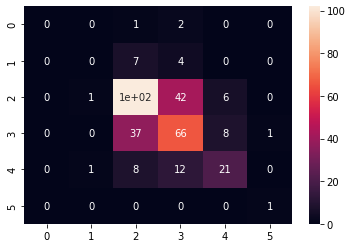

In [103]:
cf_matrix_knn5 = confusion_matrix(y_test, y_pred_knn5_pred)

sns.heatmap(cf_matrix_knn5, annot=True)

<AxesSubplot:>

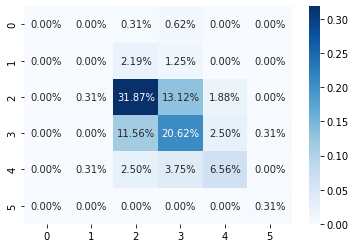

In [104]:
sns.heatmap(cf_matrix_knn5/np.sum(cf_matrix_knn5), annot=True, fmt='.2%', cmap='Blues')

### ROC Curve

In [105]:
X = df_redwine.drop(["quality"], axis=1) # attributes: ph, alcohol, etc
# Binarize the output
y = df_redwine["quality"]
y = label_binarize(y, classes=[3, 4, 5, 6, 7, 8])
n_classes = y.shape[1]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [106]:
# Learn to predict each class against the other
classifier = OneVsRestClassifier(KNeighborsClassifierWrapper())
classifier.fit(X_train, y_train)
y_score = classifier.predict(X_test)

In [107]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

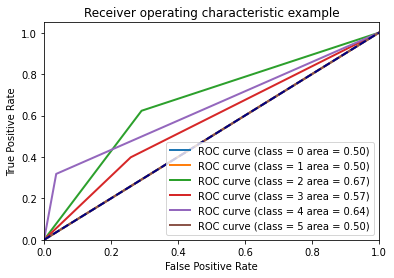

In [108]:
plt.figure()
lw = 2

for i in range(n_classes):
  plt.plot(fpr[i], tpr[i], lw=lw, label="ROC curve (class = {0} area = {1:0.2f})".format(i, roc_auc[i]))
  
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

### Cross validation

In [109]:
X = df_redwine.drop(["quality"], axis=1) # attributes: ph, alcohol, etc
y = df_redwine["quality"]

scores = cross_val_score(knn5_wr, X, y, cv=5)

print("Scores: ", scores)
print("Mean score: ", scores.mean())
print("Standard deviation: ", scores.std())

Scores:  [0.446875   0.475      0.4625     0.390625   0.43573668]
Mean score:  0.4421473354231975
Standard deviation:  0.029022497910809644


# Random Forest (RF)

In [110]:
train, test = train_test_split(df_redwine, train_size=0.8)
X_train = train.drop(["quality"], axis=1) # attributes: ph, alcohol, etc
y_train = train["quality"]

X_test = test.drop(["quality"], axis=1) # attributes: ph, alcohol, etc
y_test = test["quality"]

In [111]:
rfc = RandomForestClassifier(n_estimators=100)
y_pred_rfc = rfc.fit(X_train, y_train)
y_pred_rfc_pred = rfc.predict(X_test)

In [112]:
class RandomForestClassifierWrapper(RandomForestClassifier):
  def predict(self, X):
    # Call to RandomForestClassifier "predict"
    temp = super().predict(X)
    # Rounding numbers
    return np.rint(temp).astype(int)

In [113]:
rfc_wr = RandomForestClassifierWrapper().fit(X_train, y_train)
y_test_pred = rfc_wr.predict(X_test)

### Confusion matrix

<AxesSubplot:>

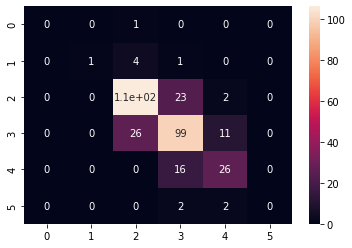

In [114]:
cf_matrix_rfc = confusion_matrix(y_test, y_pred_rfc_pred)

sns.heatmap(cf_matrix_rfc, annot=True)

<AxesSubplot:>

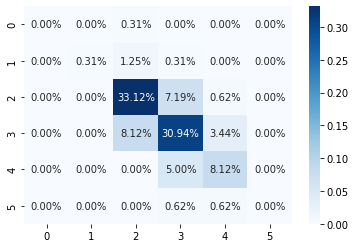

In [115]:
sns.heatmap(cf_matrix_rfc/np.sum(cf_matrix_rfc), annot=True, fmt='.2%', cmap='Blues')

### ROC Curve

In [116]:
X = df_redwine.drop(["quality"], axis=1) # attributes: ph, alcohol, etc
# Binarize the output
y = df_redwine["quality"]
y = label_binarize(y, classes=[3, 4, 5, 6, 7, 8])
n_classes = y.shape[1]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [117]:
# Learn to predict each class against the other
classifier = OneVsRestClassifier(RandomForestClassifierWrapper())
classifier.fit(X_train, y_train)
y_score = classifier.predict(X_test)

In [118]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

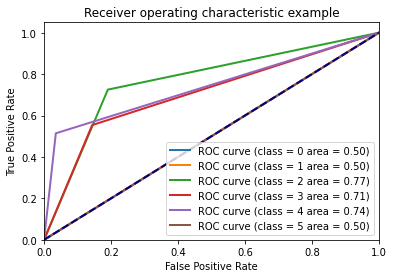

In [119]:
plt.figure()
lw = 2

for i in range(n_classes):
  plt.plot(fpr[i], tpr[i], lw=lw, label="ROC curve (class = {0} area = {1:0.2f})".format(i, roc_auc[i]))
  
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

### Cross validation

In [120]:
X = df_redwine.drop(["quality"], axis=1) # attributes: ph, alcohol, etc
y = df_redwine["quality"]

scores = cross_val_score(rfc_wr, X, y, cv=5)

print("Scores: ", scores)
print("Mean score: ", scores.mean())
print("Standard deviation: ", scores.std())

Scores:  [0.5375     0.559375   0.59375    0.590625   0.55799373]
Mean score:  0.5678487460815047
Standard deviation:  0.021352305694786307
